In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/kc_house_data.csv")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# checks for missing data
# df.isnull().sum()

# Part 2 - Data Preprocessing and Creating a Model

In [26]:
# convert from string to datetime
df.date = pd.to_datetime(df.date)

In [28]:
df["year"] = df.date.apply(lambda date: date.year)
df["month"] = df.date.apply(lambda date: date.month)
df = df.drop("date", axis=1)

In [29]:
X = df.drop("price", axis=1).values
y = df.price.values

In [19]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
X_train.shape

(15117, 21)

In [37]:
model = Sequential()

model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [38]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 7ms/step - loss: 436446141098.6667 - val_loss: 418912468992.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 430029852125.8666 - val_loss: 414862901248.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 425374083208.5333 - val_loss: 378696826880.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 359914912699.7333 - val_loss: 256707002368.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 235103153083.7333 - val_loss: 120971411456.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 114617864396.8000 - val_loss: 99557302272.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 99672617779.2000 - val_loss: 98029027328.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 93395976874.6667 - val_loss: 96480944128.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 4ms/step - loss: 43114304580.2667 - val_loss: 41083691008.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 42082255957.3333 - val_loss: 41164881920.0000
Epoch 70/400
119/119 [==============================] - 0s 4ms/step - loss: 40945904776.5333 - val_loss: 40994045952.0000
Epoch 71/400
119/119 [==============================] - 0s 3ms/step - loss: 40344842103.4667 - val_loss: 40977264640.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 41173532774.4000 - val_loss: 40928735232.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 46067731319.4667 - val_loss: 41035182080.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 40316446020.2667 - val_loss: 40846729216.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 40293770120.5333 - val_loss: 40817487872.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 35341409433.6000 - val_loss: 35497091072.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 34323583982.9333 - val_loss: 35323129856.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 34258296012.8000 - val_loss: 35217043456.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 35127148748.8000 - val_loss: 35143573504.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 34410914355.2000 - val_loss: 35021340672.0000
Epoch 140/400
119/119 [==============================] - 0s 4ms/step - loss: 37366413277.8667 - val_loss: 35003736064.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 35710612343.4667 - val_loss: 34784661504.0000
Epoch 142/400
119/119 [==============================] - 0s 4ms/step - loss: 34027330167.4667 - val_loss: 34689777664.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 31468758084.2667 - val_loss: 31469422592.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 31731439513.6000 - val_loss: 31327217664.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 31696953941.3333 - val_loss: 31347073024.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 31313137100.8000 - val_loss: 31174438912.0000
Epoch 205/400
119/119 [==============================] - 0s 4ms/step - loss: 31979663411.2000 - val_loss: 31166556160.0000
Epoch 206/400
119/119 [==============================] - 1s 5ms/step - loss: 32339676467.2000 - val_loss: 31304775680.0000
Epoch 207/400
119/119 [==============================] - 0s 4ms/step - loss: 34813639850.6667 - val_loss: 31092033536.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 32082263927.4667 - val_loss: 31097931776.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 31492182954.6667 - val_loss: 29938497536.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 30957426568.5333 - val_loss: 29951750144.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 31356298188.8000 - val_loss: 29923049472.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 30517857518.9333 - val_loss: 29917636608.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30649749947.7333 - val_loss: 30053470208.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 32292684953.6000 - val_loss: 29889601536.0000
Epoch 273/400
119/119 [==============================] - 0s 4ms/step - loss: 29636479726.9333 - val_loss: 29856567296.0000
Epoch 274/400
119/119 [==============================] - 0s 4ms/step - loss: 29598758638.9333 - val_loss: 29874259968.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 27665289608.5333 - val_loss: 29079121920.0000
Epoch 334/400
119/119 [==============================] - 0s 3ms/step - loss: 29503471069.8667 - val_loss: 29228912640.0000
Epoch 335/400
119/119 [==============================] - 0s 3ms/step - loss: 26948453060.2667 - val_loss: 29649653760.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 29369999189.3333 - val_loss: 29061124096.0000
Epoch 337/400
119/119 [==============================] - 0s 3ms/step - loss: 29300942626.1333 - val_loss: 29015732224.0000
Epoch 338/400
119/119 [==============================] - 0s 3ms/step - loss: 30713498350.9333 - val_loss: 29027020800.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 28872701132.8000 - val_loss: 29099640832.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 29097014476.8000 - val_loss: 29108500480.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 28631719543.4667 - val_loss: 28438126592.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 28804423918.9333 - val_loss: 28393506816.0000


# Part 3 - Model Evaluation and Predictions

<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

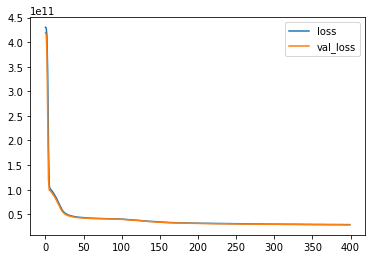

In [42]:
pd.DataFrame(model.history.history).plot()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [44]:
preds = model.predict(X_test)

In [47]:
mean_squared_error(y_test, preds) ** 0.5

168503.734872716

In [48]:
mean_absolute_error(y_test, preds)

106117.74042365934

In [49]:
explained_variance_score(y_test, preds)

0.7859667897685672

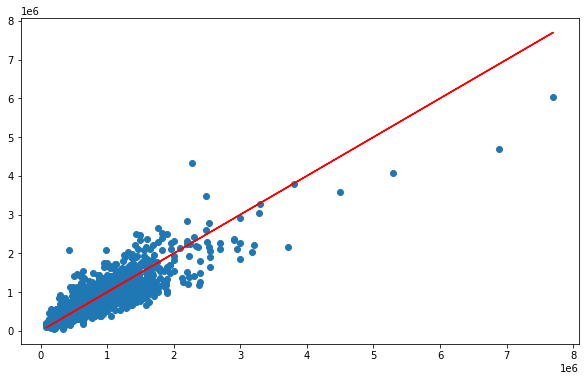

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, preds)
plt.plot(y_test, y_test, "r");

In [59]:
# to predict on new data
new_house = df.drop("price", axis=1).iloc[0] # create fake new house

In [61]:
new_house = scaler.transform(new_house.values.reshape(-1, 21))

In [63]:
model.predict(new_house)

array([[274032.9]], dtype=float32)

In [65]:
df.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
